___
Data contain a table with the average consumption of 17 different types of food per week, per country in the UK. The consumption is measured in gr.
___


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape, GaussianNoise
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
df = pd.read_csv('./data/UK_foods.csv', index_col=0)

In [3]:
df.head()

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209


# Create the model

In [4]:
encoder = Sequential()
encoder.add(Dense(units=8, activation='relu', input_shape=[17]))
encoder.add(Dense(units=4, activation='relu', input_shape=[8]))
encoder.add(Dense(units=2, activation='relu', input_shape=[4]))

decoder = Sequential()
decoder.add(Dense(units=4, activation='relu', input_shape=[2]))
decoder.add(Dense(units=8, activation='relu', input_shape=[4]))
decoder.add(Dense(units=17, activation='relu', input_shape=[8]))

In [5]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="mse", optimizer=SGD(lr=1.))

# Scale the data

In [6]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df.transpose().values)

In [7]:
autoencoder.fit(scaled_df,
                scaled_df,
                epochs=30)

Epoch 1/30
1/1 [==============================] - 0s 1ms/step - loss: 0.3541
Epoch 2/30
1/1 [==============================] - 0s 1ms/step - loss: 0.3432
Epoch 3/30
1/1 [==============================] - 0s 1ms/step - loss: 0.3385
Epoch 4/30
1/1 [==============================] - 0s 1ms/step - loss: 0.3353
Epoch 5/30
1/1 [==============================] - 0s 1ms/step - loss: 0.3332
Epoch 6/30
1/1 [==============================] - 0s 1ms/step - loss: 0.3317
Epoch 7/30
1/1 [==============================] - 0s 1ms/step - loss: 0.3312
Epoch 8/30
1/1 [==============================] - 0s 1000us/step - loss: 0.3301
Epoch 9/30
1/1 [==============================] - 0s 1ms/step - loss: 0.3312
Epoch 10/30
1/1 [==============================] - 0s 0s/step - loss: 0.3304
Epoch 11/30
1/1 [==============================] - 0s 1000us/step - loss: 0.3345
Epoch 12/30
1/1 [==============================] - 0s 1ms/step - loss: 0.3314
Epoch 13/30
1/1 [==============================] - 0s 1ms/step - los

In [8]:
encoded_2dim = encoder.predict(scaled_df)
encoded_2dim

array([[0.       , 1.3373184],
       [0.       , 1.84269  ],
       [0.       , 1.243361 ],
       [0.       , 0.       ]], dtype=float32)

In [9]:
df.transpose().index

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

In [10]:
results = pd.DataFrame(data=encoded_2dim,index=df.transpose().index,
                      columns=['C1','C2']).reset_index()

In [11]:
results

,index,C1,C2
0,England,0.0,1.337318
1,Wales,0.0,1.842690
2,Scotland,0.0,1.243361
3,N.Ireland,0.0,0.000000


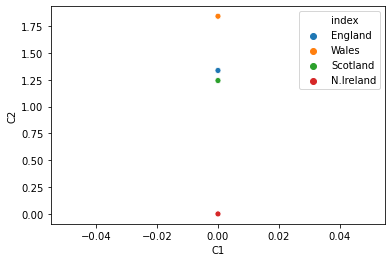

In [12]:
sns.scatterplot(x='C1',y='C2',data=results,hue='index')